In [7]:
import pandas as pd
from shapely.geometry import Point, Polygon
import json
import seaborn as sns

# Cargar datos desde el archivo CSV
df_csv = pd.read_csv('Data_Medellin.csv')

# Convertir las columnas de coordenadas en geometrías
geometry_csv = [Point(xy) for xy in zip(df_csv['long'], df_csv['latitude'])]

# Cargar datos desde el archivo GeoJSON
with open('Comunas y Corregimientos de Medellín.geojson', encoding='utf-8') as f:
    geojson_data = json.load(f)

# Filtrar los polígonos válidos
valid_polygons = [feature['geometry']['coordinates'][0] for feature in geojson_data['features'] if len(feature['geometry']['coordinates'][0]) >= 3]

# Crear objetos Polygon solo para polígonos válidos
polygons = [Polygon(coords) for coords in valid_polygons]

# Función para encontrar la comuna correspondiente
def find_commune(point):
    for i, polygon in enumerate(polygons):
        if polygon.contains(point):
            properties = geojson_data['features'][i]['properties']
            commune_name = properties.get('Commune_name')
            commune_number = properties.get('Commune_number')
            return commune_name, commune_number
    return None, None  # Devolver None si no se encuentra ninguna comuna

# Aplicar la función para encontrar la comuna a cada punto
df_csv['Commune_info'] = df_csv.apply(lambda row: find_commune(Point(row['long'], row['latitude'])), axis=1)

# Dividir la información de la comuna en columnas separadas
df_csv[['Commune_name', 'Commune_number']] = pd.DataFrame(df_csv['Commune_info'].tolist(), index=df_csv.index)

# Imprimir el resultado
print(df_csv)


                       id                                              title  \
0     1011761919469637760                    Hermoso apartamento las  palmas   
1      957959124861517056                        PVT APT  3BD  - Lleras Park   
2      705259118691125248  Amplia y acogedora casa de habitación privada ...   
3                 7840662               POBLADO NEAR PARQUE LLERAS APARTMENT   
4      705231926741978496         Dormitorio privado completamente amueblado   
...                   ...                                                ...   
6406   786538615530685343                                         hong Kong.   
6407   799471195625391242    Laureles cerca a todo el mejor barrio apto full   
6408   802765122994562860                Espectacular  apto en villa hermosa   
6409   919751514352704714            Apartamento Central Moderno con Piscina   
6410  1062263685494677689                          PH único provenza Poblado   

          price                        

In [8]:
print(df_csv['Commune_name'].unique())

['Buenos Aires' '12 de Octubre' 'La Candelaria' 'Belén'
 'Corregimiento San Sebastián de Palmitas' 'Corregimiento de Altavista'
 'Popular' 'Guayabal' 'La América' None 'Castilla' 'San Javier' 'Aranjuez'
 'El Poblado' 'Manrique' 'Laureles Estadio' 'Corregimiento Santa Elena'
 'Corregimiento San Antonio de Prado']


In [9]:
df_csv.loc[df_csv['Commune_name'] == 'San Javier', ['Commune_name']] = 'Villa Hermosa'
print(df_csv['Commune_name'].unique())

['Buenos Aires' '12 de Octubre' 'La Candelaria' 'Belén'
 'Corregimiento San Sebastián de Palmitas' 'Corregimiento de Altavista'
 'Popular' 'Guayabal' 'La América' None 'Castilla' 'Villa Hermosa'
 'Aranjuez' 'El Poblado' 'Manrique' 'Laureles Estadio'
 'Corregimiento Santa Elena' 'Corregimiento San Antonio de Prado']


In [10]:
print(len(df_csv[df_csv['Commune_name'].isnull()]))

198


In [11]:
print(len(df_csv[df_csv['Commune_number'].notnull()]))

print(df_csv[df_csv['Commune_number'].notnull()])

6098
                       id                                              title  \
0     1011761919469637760                    Hermoso apartamento las  palmas   
1      957959124861517056                        PVT APT  3BD  - Lleras Park   
2      705259118691125248  Amplia y acogedora casa de habitación privada ...   
3                 7840662               POBLADO NEAR PARQUE LLERAS APARTMENT   
4      705231926741978496         Dormitorio privado completamente amueblado   
...                   ...                                                ...   
6406   786538615530685343                                         hong Kong.   
6407   799471195625391242    Laureles cerca a todo el mejor barrio apto full   
6408   802765122994562860                Espectacular  apto en villa hermosa   
6409   919751514352704714            Apartamento Central Moderno con Piscina   
6410  1062263685494677689                          PH único provenza Poblado   

          price                   

In [12]:
print(len(df_csv[df_csv['Commune_name'].isnull()]))
print(df_csv[df_csv['Commune_name'].isnull()])

198
                       id                                              title  \
295   1018334590714605952                           Casa campestre la Bonita   
373   1052664732073271168                                   Casa finca Apolo   
466    564392279335403904  Disfruta una salida de verano y piscina Girardota   
541              38313297  Buena vista luxury House!!! Girardota - Antioquia   
627   1023470890334383360                               Casa de campo lujosa   
...                   ...                                                ...   
6202   922184650483071663                      Apartamento amoblado calazans   
6206             52985893  Apartamento 2 hab, 2 cama, 3 closet, 2 baños, C.I   
6303   903149213721015910                 Penthouse Luxury Duplex Las Palmas   
6330             19478365                                Tu casa en Medellín   
6371   892216583242977205                           Casa campestre La Bonita   

          price                    

In [13]:
print(df_csv[df_csv['long'] > 0])

Empty DataFrame
Columns: [id, title, price, description, long, latitude, review_airbnb, calification_rate, created_at, verified, host_review, cameras_on_site, rooms, year, city, Commune_info, Commune_name, Commune_number]
Index: []


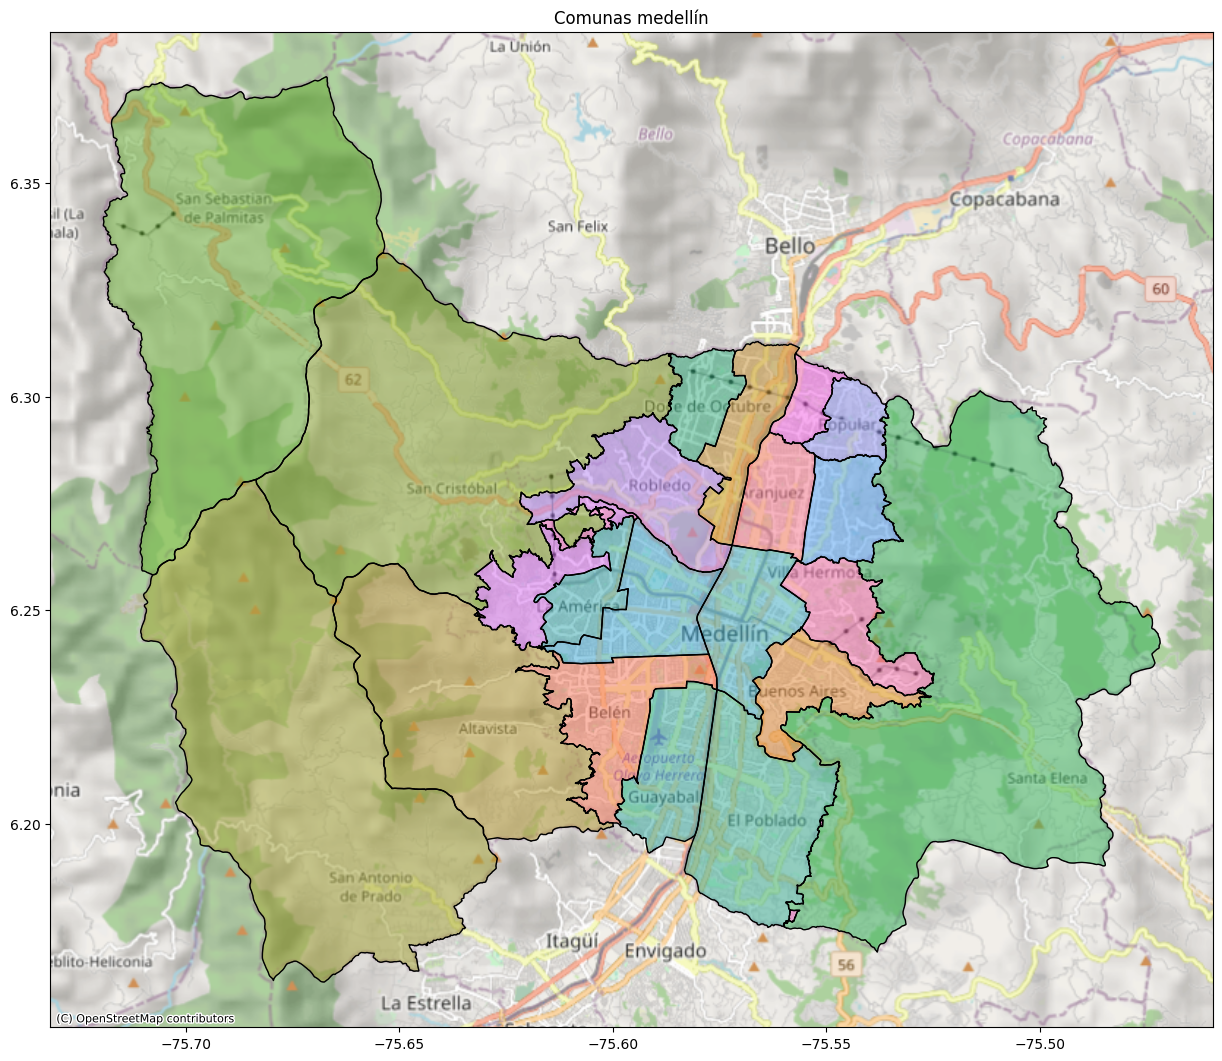

In [14]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from comunasmed import comunas

title = 'Comunas medellín'
div_pol_city = comunas(title)
div_pol_city.plot_comunas_area()

C:\Users\NICOL\AppData\Local\Temp\ipykernel_1952\2785962587.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=map, x='long', y='latitude', hue='Commune_name', palette='tab10', alpha=0.4)


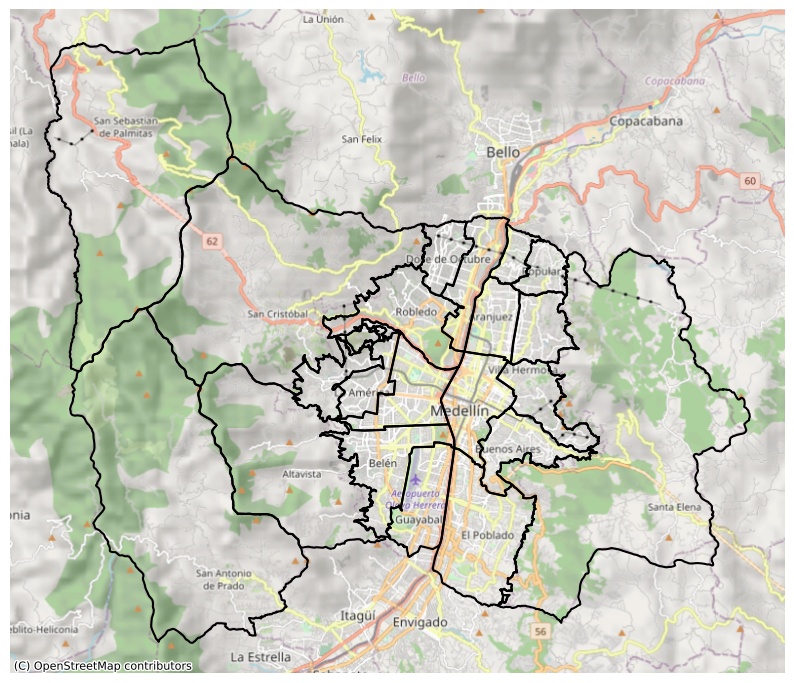

In [15]:
#Test 1st San Javier
sj1 = df_csv[df_csv['Commune_name'] == 'San Javier']
sj1 = sj1[sj1['long']<0]
comuna_sj = sj1['Commune_name'].unique()

map = sj1.dropna(subset = ['latitude', 'long'])
map = gpd.GeoDataFrame(map, geometry=gpd.points_from_xy(map['long'], map['latitude']))
map = map.set_crs(epsg=4326) 
ti = 'San Javier 1'
sj2 = comunas(ti, comuna_sj)

fig, ax = plt.subplots(figsize=(10, 10))
sj2.commune_croquis(ax = ax)
ax.set_axis_off()
sns.scatterplot(data=map, x='long', y='latitude', hue='Commune_name', palette='tab10', alpha=0.4)

#map.plot(ax=ax, color='blue', markersize=50, alpha=0.5)
#ctx.add_basemap(ax, crs=geomap.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
ctx.add_basemap(ax, crs=map.crs.to_string(), source=ctx.providers.OpenStreetMap.CH) #Wtith little topograph aspects
#plt.legend(fontsize='x-small', loc='lower left') 
plt.show()


In [16]:
import geopandas as gpd

# Cargar el GeoJSON como un GeoDataFrame
gdf = gpd.read_file('Comunas y Corregimientos de Medellín.geojson', encoding='utf-8')

# Filtrar el GeoDataFrame para obtener solo la comuna 'San Javier'
san_javier = gdf[gdf['Commune_name'] == 'San Javier']

# Verificar si se encontró la comuna 'San Javier'
if not san_javier.empty:
    # Obtener el polígono que representa la comuna 'San Javier'
    san_javier_polygon = san_javier.geometry.iloc[0]

    # Calcular los límites del polígono
    minx, miny, maxx, maxy = san_javier_polygon.bounds

    # Imprimir los límites
    print("Límites de San Javier:")
    print("Longitud mínima:", minx)
    print("Longitud máxima:", maxx)
    print("Latitud mínima:", miny)
    print("Latitud máxima:", maxy)
else:
    print("No se encontró la comuna 'San Javier' en el GeoJSON.")


Límites de San Javier:
Longitud mínima: -75.6324264433567
Longitud máxima: -75.5941223963915
Latitud mínima: 6.24056591548945
Latitud máxima: 6.27667596038732


In [17]:
#Puntos San Javier
min_lon = -75.6324264433567
max_lon = -75.6000000
min_lat = 6.24056591548945
max_lat = 6.27000000
# Filtra los puntos que pertenecen a la comuna 'San Javier' y no tienen comuna asignada
geomap1 = df_csv[(df_csv['long'] < 0) & (df_csv['Commune_name'].isnull())]
geomap1 = geomap1[(geomap1['long'] >= min_lon) & (geomap1['long'] <= max_lon) &
             (geomap1['latitude'] >= min_lat) & (geomap1['latitude'] <= max_lat)]
geomap1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 695 to 4768
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 90 non-null     int64  
 1   title              90 non-null     object 
 2   price              90 non-null     float64
 3   description        90 non-null     object 
 4   long               90 non-null     float64
 5   latitude           90 non-null     float64
 6   review_airbnb      90 non-null     float64
 7   calification_rate  58 non-null     float64
 8   created_at         90 non-null     object 
 9   verified           84 non-null     object 
 10  host_review        69 non-null     float64
 11  cameras_on_site    90 non-null     bool   
 12  rooms              90 non-null     float64
 13  year               90 non-null     float64
 14  city               90 non-null     object 
 15  Commune_info       90 non-null     object 
 16  Commune_name       0 non-null

In [18]:
#Clasificar puntos de comuna excluida y donde se observa gran cantidad de estos
geomap1['Commune_name'] = 'San Javier'
geomap1['Commune_number'] = 'Comuna 13'
geomap1 = geomap1.drop(columns=['Commune_info'])
update_column = ['Commune_name', 'Commune_number']
df_csv = df_csv.merge(geomap1[['id'] + update_column], on = 'id', how = 'left', suffixes=('_original', '_nuevo'))
# Actualiza los valores en las columnas específicas en df1 con los valores de df2
for column in update_column:
    df_csv[column] = df_csv[f'{column}_nuevo'].fillna(df_csv[f'{column}_original'])

# Elimina las columnas auxiliares creadas durante la fusión
df_csv.drop([f'{column}_original' for column in update_column] + [f'{column}_nuevo' for column in update_column], axis=1, inplace=True)
df_csv = df_csv.rename(columns= {'Commune_name_original': 'Commune_name',
                                 'Commmune_number_original': 'Commune_number'})
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6411 entries, 0 to 6410
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 6411 non-null   int64  
 1   title              6411 non-null   object 
 2   price              6411 non-null   float64
 3   description        6411 non-null   object 
 4   long               6411 non-null   float64
 5   latitude           6411 non-null   float64
 6   review_airbnb      6411 non-null   float64
 7   calification_rate  4861 non-null   float64
 8   created_at         5582 non-null   object 
 9   verified           5526 non-null   object 
 10  host_review        5434 non-null   float64
 11  cameras_on_site    6411 non-null   bool   
 12  rooms              6411 non-null   float64
 13  year               5582 non-null   float64
 14  city               6411 non-null   object 
 15  Commune_info       6411 non-null   object 
 16  Commune_name       6303 

In [19]:
# Reemplazar los valores en la columna 'Commune_name' según la especificación dada
df_csv['Commune_name'].replace({'El Poblado': 'Guayabal',
                                 'Guayabal': 'La América',
                                 'La América': 'La Candelaria',
                                 'La Candelaria': 'Laureles Estadio',
                                 'Laureles Estadio': 'Popular',
                                 'Popular': 'Robledo',
                                 '12 de Octubre': 'El Poblado'}, inplace=True)

# Imprimir el resultado
print(df_csv)


                       id                                              title  \
0     1011761919469637760                    Hermoso apartamento las  palmas   
1      957959124861517056                        PVT APT  3BD  - Lleras Park   
2      705259118691125248  Amplia y acogedora casa de habitación privada ...   
3                 7840662               POBLADO NEAR PARQUE LLERAS APARTMENT   
4      705231926741978496         Dormitorio privado completamente amueblado   
...                   ...                                                ...   
6406   786538615530685343                                         hong Kong.   
6407   799471195625391242    Laureles cerca a todo el mejor barrio apto full   
6408   802765122994562860                Espectacular  apto en villa hermosa   
6409   919751514352704714            Apartamento Central Moderno con Piscina   
6410  1062263685494677689                          PH único provenza Poblado   

          price                        

In [20]:
print(df_csv['Commune_name'].unique())

['Buenos Aires' 'El Poblado' 'Laureles Estadio' 'Belén'
 'Corregimiento San Sebastián de Palmitas' 'Corregimiento de Altavista'
 'Robledo' 'La América' 'La Candelaria' None 'Castilla' 'Villa Hermosa'
 'Aranjuez' 'Guayabal' 'San Javier' 'Manrique' 'Popular'
 'Corregimiento Santa Elena' 'Corregimiento San Antonio de Prado']


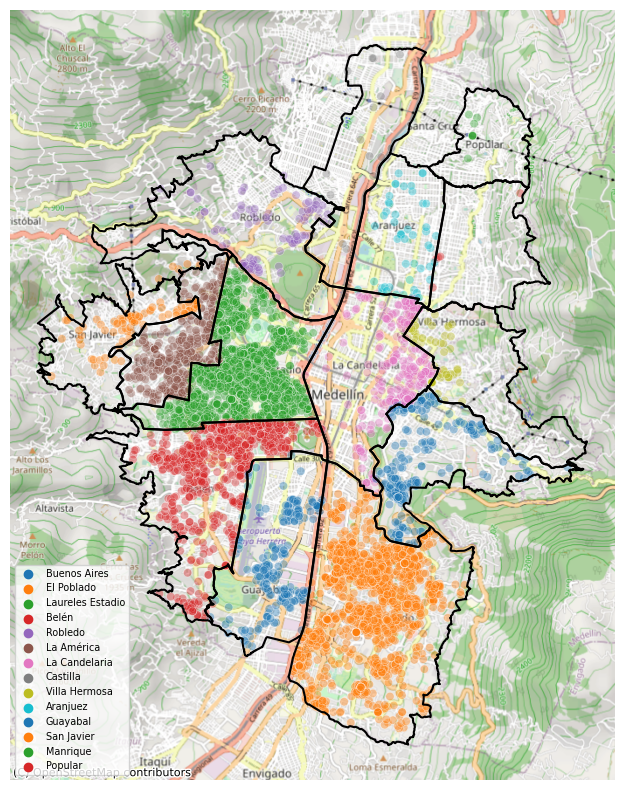

In [21]:
df_csv3 = df_csv[df_csv['Commune_name'].notnull()]
filtered = ~df_csv3['Commune_name'].str.contains('Corregimiento')
df_csv3 = df_csv3[filtered]
comunas_med3 = df_csv3['Commune_name'].unique()
geomap = df_csv3.dropna(subset = ['latitude', 'long'])
geomap = gpd.GeoDataFrame(geomap, geometry=gpd.points_from_xy(geomap['long'], geomap['latitude']))

geomap = geomap.set_crs(epsg=4326)
title3 = 'Urban'
med_comunas3 = comunas(title3, comunas_med3)
fig, ax = plt.subplots(figsize=(10, 10))
med_comunas3.commune_croquis(ax = ax)
ax.set_axis_off()
sns.scatterplot(data=geomap, x='long', y='latitude', hue='Commune_name', palette='tab10', alpha=0.4)

# Plot de los puntos con transparencia
#geomap.plot(ax=ax, color='blue', markersize=100, alpha=0.5)
#ctx.add_basemap(ax, crs=geomap.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
ctx.add_basemap(ax, crs=geomap.crs.to_string(), source=ctx.providers.OpenStreetMap.CH) #Wtith little topograph aspects
plt.legend(fontsize='x-small', loc='lower left') 
plt.show()


In [22]:
#puntos['El Poblado'] = will be ['Guayabal']
#puntos['Guayabal'] = will be ['La América]
#puntos['La América'] = will be ['La Candelaria']
#puntos['La Candelaria'] = will be ['Laureles Estadio']
#puntos['Laureles Estadio'] = will be ['Popular']
#puntos['Popular'] = will be ['Robledo']
#puntto['12 de Octubre'] = will be ['El Poblado']